In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import datetime
import numpy as np
import pyodbc

In [106]:
f = open('./drainage_meta_data.json', encoding='utf-8')
df = pd.DataFrame(json.load(f)['sensors'])
df.head(2)

,name:,ID,flow,combined_flow,level,veita,downstream,upstream
0,Seilugrandi,RVK-SEI,[RS111],[],[HS111],Skerjafjarðarveita,[RVK-ANA],[]
1,Boðagrandi,RVK-BOD,[RS111],[],[HS111],Skerjafjarðarveita,[RVK-ANA],[]


In [107]:
SAVE_DIR = './raw data/'
for index,ID in df.loc[:,'ID'].iteritems():
    filename_flow = SAVE_DIR + f'F-{ID}-RS'
    filename_level = SAVE_DIR + f'F-{ID}-HS'
    df.loc[index,'DIR_flow'] = filename_flow
    df.loc[index,'DIR_level'] = filename_level

In [108]:
dt_start = datetime.datetime(2010,1,1,0,0,0)
dt_end = datetime.datetime(2020,12,31,23,59,59)

dict_flow = {}
dict_level = {}

for index,row in df.iterrows():
    dict_flow[row.ID] = pd.read_pickle(row.DIR_flow)
    dict_level[row.ID] = pd.read_pickle(row.DIR_level)

In [5]:
# dataframe.CTime = pd.to_datetime(dataframe.CTime)
# dataframe = dataframe[(dataframe.Flag == 0) & (dataframe.CType == 4)]
# dict_flow['RVK-KLE']

In [151]:
# for key in dict_flow:
#     df_tmp = dict_flow[key]
#     min_tmp = df_tmp[(df_tmp.CType == 7)].CTime.min()
#     max_tmp = df_tmp[(df_tmp.CType == 9)].CTime.max()
#     print(key,min_tmp,max_tmp)
df_flow_tmp_raw = dict_flow['RVK-GEL']

In [147]:

dict_flow.keys()

dict_keys(['RVK-SEI', 'RVK-BOD', 'RVK-VES', 'KOP-HAB', 'RVK-SKE', 'RVK-FAX', 'RVK-ANA', 'MOS-HOL', 'RVK-ING', 'RVK-LAU', 'RVK-GUF', 'RVK-GEL', 'RVK-KLE'])

CTime
2013-09-03 11:00:00      0.000000
2013-09-03 11:00:00      0.000000
2013-09-03 12:00:00      0.000000
2013-09-03 12:00:00      0.000000
2013-09-03 13:00:00      0.000000
                          ...    
2021-09-12 00:00:00      0.000000
2021-09-12 01:00:00    126.028989
2021-09-12 01:00:00      0.000000
2021-09-12 02:00:00      0.000000
2021-09-12 02:00:00      0.000000
Name: Val, Length: 280368, dtype: float64

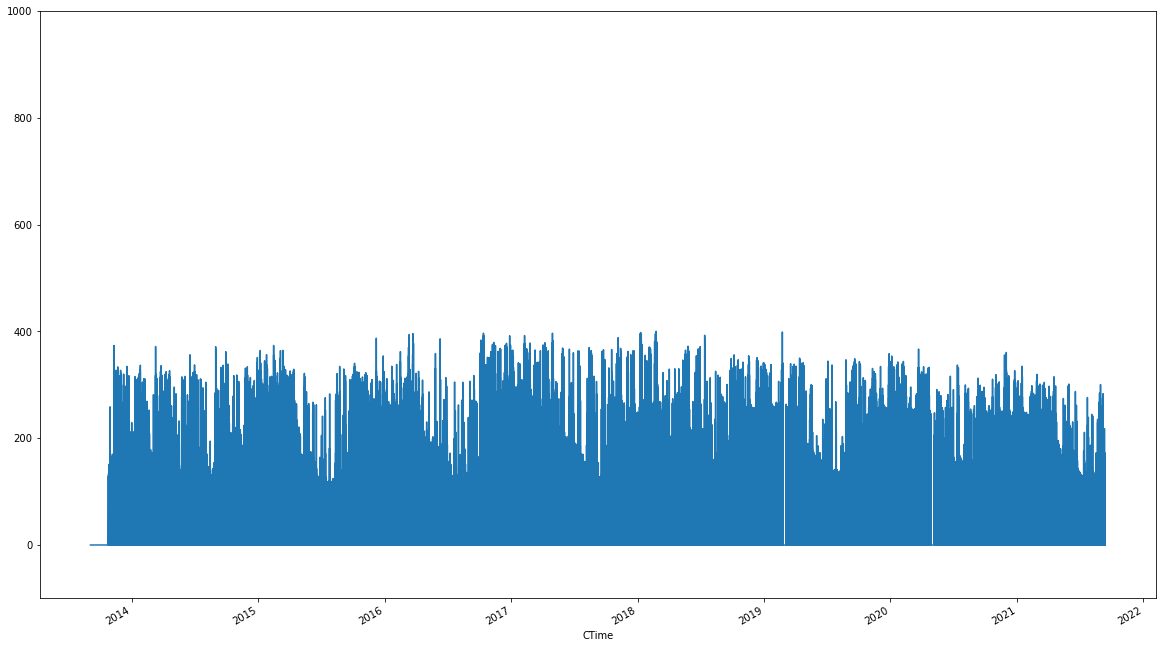

In [154]:
plt.figure(figsize=(20,12))

tmp_df = df_flow_tmp_raw.loc[df_flow_tmp_raw.CType == 4].loc[:,['CTime','Val','CType']]
tmp_df.index = pd.DatetimeIndex(tmp_df.CTime)
tmp_df = tmp_df.loc[:,'Val']
tmp_df.plot()

# tmp_df = df_flow_tmp_raw.loc[df_flow_tmp_raw.CType == 9].loc[:,['PTime','Val','CType']]
# tmp_df.index = pd.DatetimeIndex(tmp_df.PTime)
# tmp_df = tmp_df.loc[:,'Val']
# tmp_df.plot()

# tmp_df = df_flow_tmp_raw.loc[df_flow_tmp_raw.CType == 7].loc[:,['PTime','Val','CType']]
# tmp_df.index = pd.DatetimeIndex(tmp_df.PTime)
# tmp_df = tmp_df.loc[:,'Val']
# tmp_df.plot()

# plt.xlim(datetime.datetime(2018,11,15),datetime.datetime(2018,12,1))
plt.ylim(-100,1000)
# plt.show()
tmp_df

In [143]:
df_flow_tmp_raw.loc[(df_flow_tmp_raw.CType == 4) & (df_flow_tmp_raw.Flag == 0)].loc[:,['CTime','Val','CType']].max()

CTime    2021-09-12 02:00:00
Val              3765.596124
CType                      4
dtype: object

In [164]:
df_flow_tmp_raw.Flag.value_counts()

0            669492
262232         1841
268697668      1168
2097152         941
268697624       524
524352          126
16777280        112
268697688        80
268697620        12
262212            6
272629760         6
2621440           4
268697608         4
262230            2
262229            1
268697685         1
Name: Flag, dtype: int64

<AxesSubplot:xlabel='CTime'>

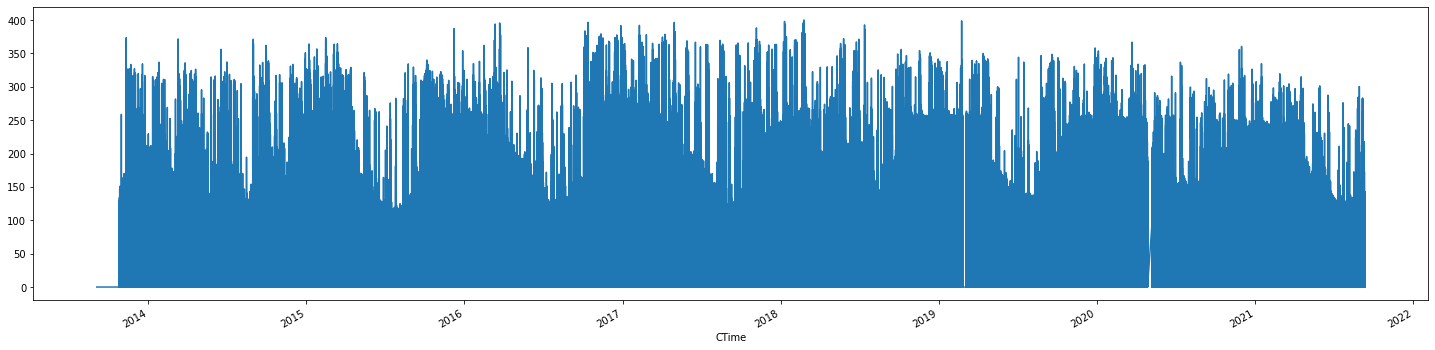

In [162]:
plt.figure(figsize=(25,6))

tmp_df = df_flow_tmp_raw.loc[(df_flow_tmp_raw.CType == 4) & (df_flow_tmp_raw.Flag == 0) #&
                            #  (df_flow_tmp_raw.Val > 0)
                             ].loc[:,['CTime','Val','CType']]
tmp_df.index = pd.DatetimeIndex(tmp_df.CTime)
tmp_df = tmp_df.loc[:,'Val']
tmp_df.plot()


# tmp_df = df_flow_tmp_raw.loc[df_flow_tmp_raw.CType == 4].loc[:,['CTime','Val','CType']]
# tmp_df.index = pd.DatetimeIndex(tmp_df.CTime)
# tmp_df = tmp_df.loc[:,'Val']
# tmp_df.plot()


# tmp_df = df_flow_tmp_raw.loc[(df_flow_tmp_raw.CType == 9) ].loc[:,['PTime','Val','CType']]
# tmp_df.index = pd.DatetimeIndex(tmp_df.PTime)
# tmp_df = tmp_df.loc[:,'Val']
# tmp_df.plot()

# # tmp_df = df_flow_tmp_raw.loc[(df_flow_tmp_raw.CType == 9) & (df_flow_tmp_raw.Flag == 0)].loc[:,['PTime','Val','CType']]
# # tmp_df.index = pd.DatetimeIndex(tmp_df.PTime)
# # tmp_df = tmp_df.loc[:,'Val']
# # tmp_df.plot()

# plt.xlim(datetime.datetime(2018,11,15),datetime.datetime(2018,12,1))
# plt.ylim(-100,10000)
# plt.legend(['mean, good only','mean all values','max value'])

In [112]:
# plt.figure(figsize=(20,12))

# tmp_df = df_flow_tmp_raw.loc[(df_flow_tmp_raw.CType == 4) & (df_flow_tmp_raw.Flag == 0)].loc[:,['CTime','Val','CType']]
# tmp_df.index = pd.DatetimeIndex(tmp_df.CTime)
# tmp_df = tmp_df.loc[:,'Val']
# tmp_df.plot()

# tmp_df = df_flow_tmp_raw.loc[(df_flow_tmp_raw.CType == 7) & (df_flow_tmp_raw.Flag == 0)].loc[:,['PTime','Val','CType']]
# tmp_df.index = pd.DatetimeIndex(tmp_df.PTime)
# tmp_df = tmp_df.loc[:,'Val']
# tmp_df.plot()

# tmp_df = df_flow_tmp_raw.loc[(df_flow_tmp_raw.CType == 9) & (df_flow_tmp_raw.Flag == 0)].loc[:,['PTime','Val','CType']]
# tmp_df.index = pd.DatetimeIndex(tmp_df.PTime)
# tmp_df = tmp_df.loc[:,'Val']
# tmp_df.plot()

# # plt.xlim(datetime.datetime(2018,1,15),datetime.datetime(2018,12,1))
# plt.ylim(-100,10000)
# # plt.show()
# tmp_df

In [125]:
def return_dataframe_and_mask(dataframe):
    if len(dataframe) == 0:
        return None,None
    dataframe.CTime = pd.to_datetime(dataframe.CTime)
    dataframe = dataframe[(dataframe.Flag == 0) & (dataframe.CType == 4)] # average and good
    y_flow = pd.pivot_table(dataframe,values='Val',index='CTime',columns='Name')

    y_flow = y_flow.resample('1h').mean()
    # y_flow[y_flow <= 0] = np.nan
    mask = y_flow.isna()
    return y_flow, mask

In [126]:
flow_list = []
flow_mask_list = []
level_list = []
level_mask_list = []
for index,row in df.iterrows():
    df_flow_tmp_raw = dict_flow[row['ID']]
    df_level_tmp_raw = dict_level[row['ID']]
    df_flow_tmp,df_flow_mask_tmp = return_dataframe_and_mask(df_flow_tmp_raw)
    df_level_tmp,df_level_mask_tmp = return_dataframe_and_mask(df_level_tmp_raw)
    
    flow_list.append(df_flow_tmp)
    flow_mask_list.append(df_flow_mask_tmp)
    
    level_list.append(df_level_tmp)
    level_mask_list.append(df_level_mask_tmp)

In [174]:
[i.columns for i in flow_list]

[Index(['F-RVK-SEI-RS111'], dtype='object', name='Name'),
 Index(['F-RVK-BOD-RS111'], dtype='object', name='Name'),
 Index(['F-RVK-VES-RS111'], dtype='object', name='Name'),
 Index(['F-KOP-HAB-RS101'], dtype='object', name='Name'),
 Index(['F-RVK-SKE-RS101', 'F-RVK-SKE-RS102', 'F-RVK-SKE-RS103',
        'F-RVK-SKE-RS104'],
       dtype='object', name='Name'),
 Index(['F-RVK-FAX-RS101', 'F-RVK-FAX-RS102', 'F-RVK-FAX-RS103',
        'F-RVK-FAX-RS104'],
       dtype='object', name='Name'),
 Index(['F-RVK-ANA-RS301-RS'], dtype='object', name='Name'),
 Index(['F-MOS-HOL-RS101', 'F-MOS-HOL-RS102', 'F-MOS-HOL-RS103'], dtype='object', name='Name'),
 Index(['F-RVK-ING-RS101', 'F-RVK-ING-RS102', 'F-RVK-ING-RS103'], dtype='object', name='Name'),
 Index(['F-RVK-LAU-RS101', 'F-RVK-LAU-RS102', 'F-RVK-LAU-RS103',
        'F-RVK-LAU-RS104'],
       dtype='object', name='Name'),
 Index(['F-RVK-GUF-RS101', 'F-RVK-GUF-RS102', 'F-RVK-GUF-RS103'], dtype='object', name='Name'),
 Index(['F-RVK-GEL-RS101', 'F

<AxesSubplot:>

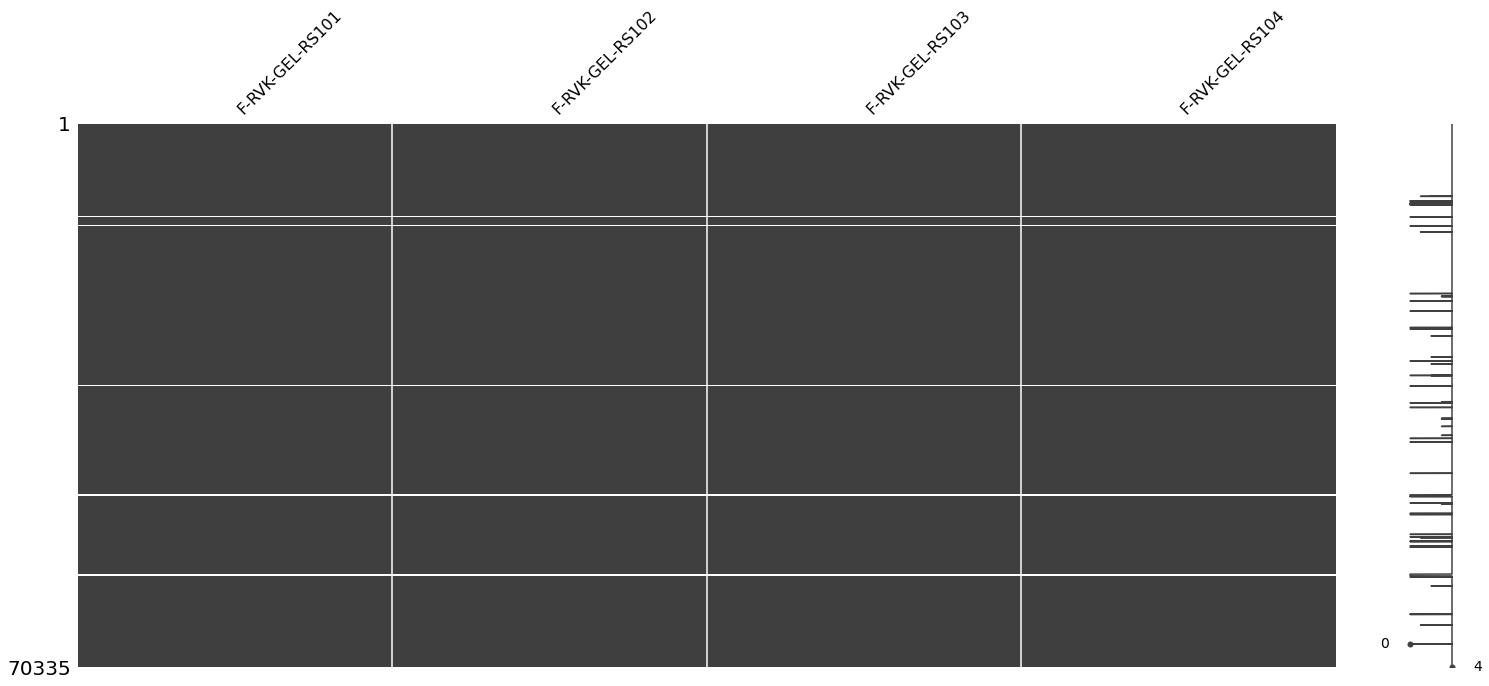

In [182]:
from missingno import matrix
matrix(flow_list[11])

<AxesSubplot:xlabel='CTime'>

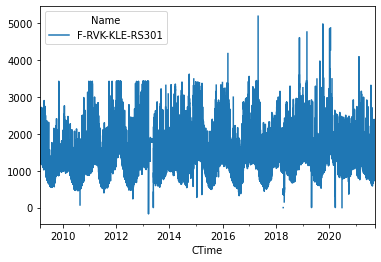

In [127]:
flow_list[-1].plot()

In [128]:
from scipy.optimize import minimize 
smoothness = lambda x : np.nanmean(np.abs(np.diff(x)))
def apply_storage_estimate(flow,level,scale):
    raw_diffs = level.diff().shift(-1).fillna(0)
    changes = scaled_diffs = scale * raw_diffs
    total_change = changes.sum(axis=1)
    # combined_flow = flow.sum(axis=1)
    return pd.DataFrame(flow.values.ravel() + total_change).sum(axis=1)

def smoothness_test(flow, level, scale):
    y_estimated_input = apply_storage_estimate(flow, level, scale)
    smooth_val = smoothness(y_estimated_input.values.ravel())
    return smooth_val

def extreem_outliers(series):
    m = series.mean()
    s = series.std()
    out_b = series < m + 8*s
    out_s = series > m - 8*s
    return ~(out_b * out_s)
    
# apply_storage_estimate(tmp_flow,tmp_level,results.x)

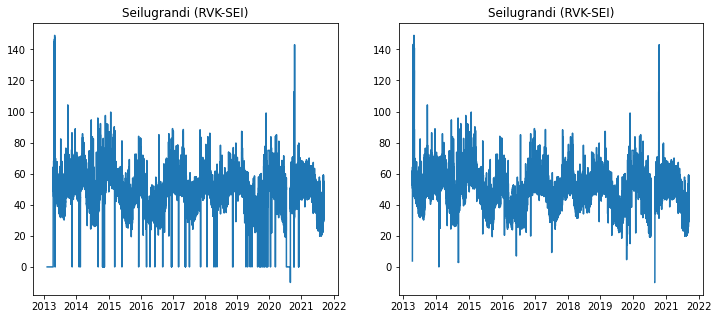

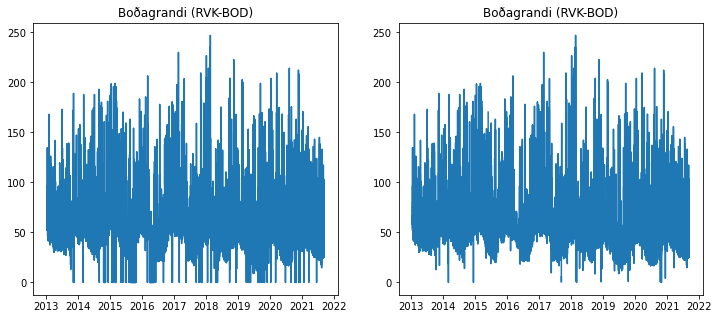

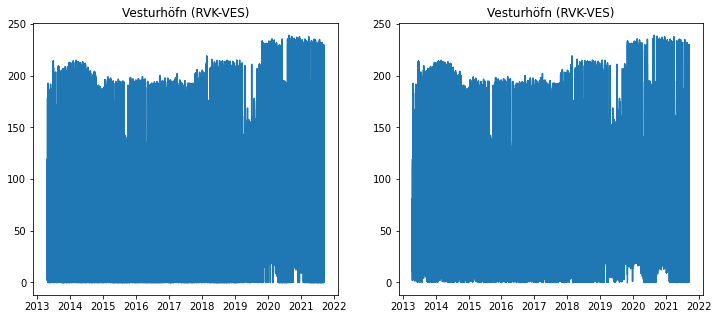

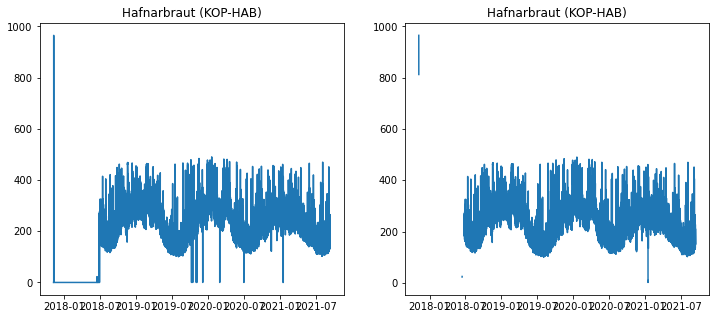

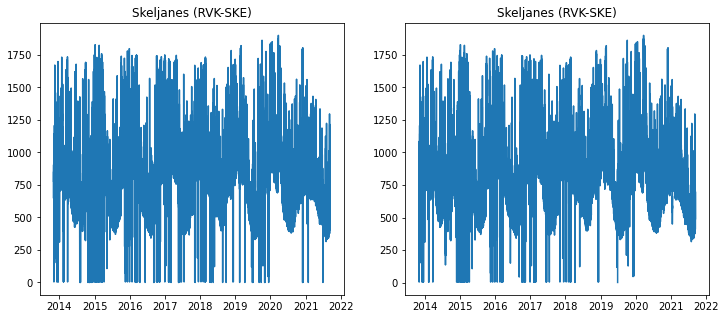

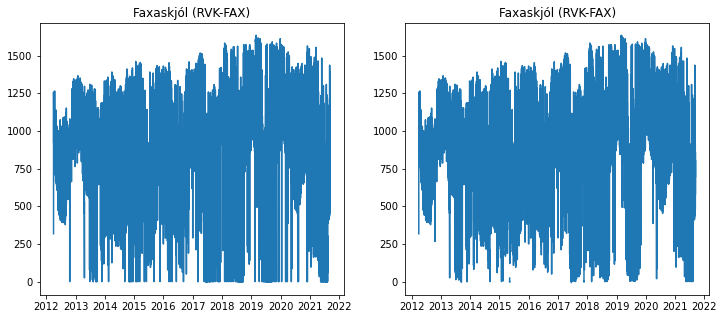

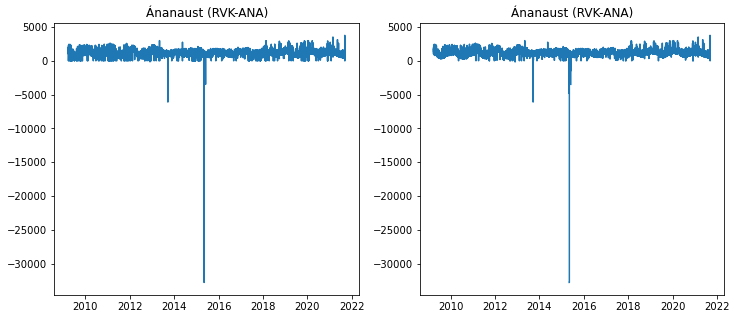

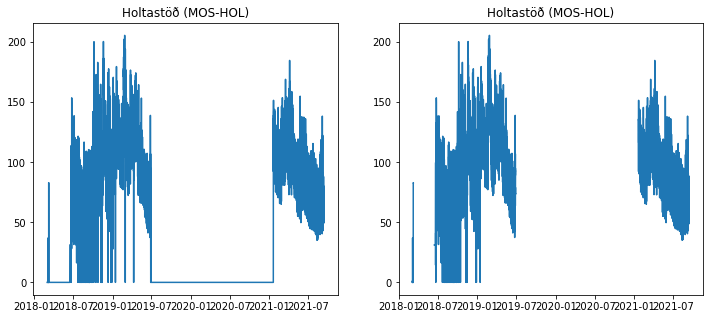

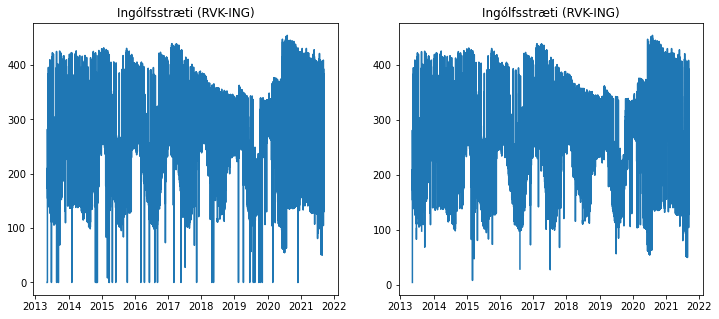

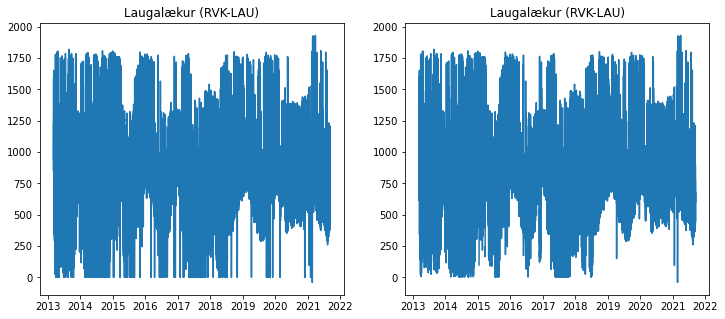

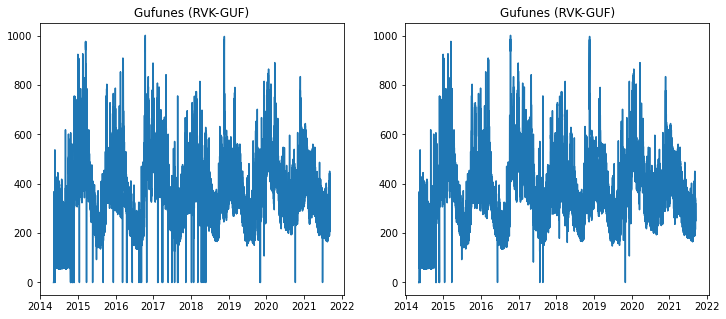

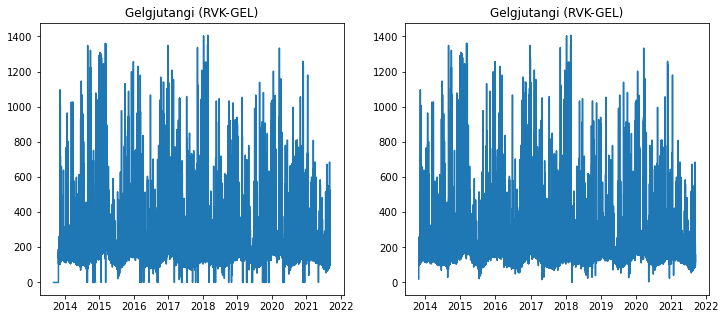

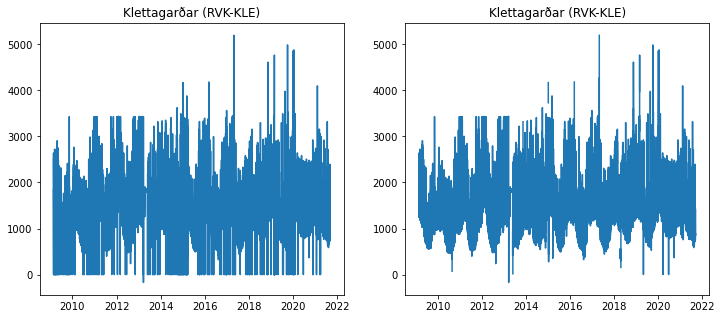

In [129]:
for i,flow in enumerate(flow_list):
    f,ax = plt.subplots(1,2,figsize=(12,5))
    name = df.iloc[i]['name:']
    key = df.iloc[i]['ID']
    ax[0].plot(flow.sum(axis=1))
    ax[0].set_title(str(name) + ' (' + str(key) + ')')
    
    tmp_flow = flow.sum(axis=1)
    tmp_flow[tmp_flow == 0] = np.nan
    tmp_flow = tmp_flow.interpolate(method='linear',limit = 3)
    ax[1].plot(tmp_flow)
    ax[1].set_title(str(name) + ' (' + str(key) + ')')
    plt.show()

In [135]:
smoothed_list = []
unsmoothed_list = []

for flow,level in zip(flow_list,level_list):
    tmp_flow = flow.copy().sum(axis=1)
    tmp_flow[tmp_flow.iloc[:] <= 0] = np.nan
    unsmoothed_list.append(tmp_flow)
    if level is None:
        level = pd.DataFrame(pd.Series(np.zeros(tmp_flow.shape),index = tmp_flow.index))
        tmp_level = level.copy()
    else:
        tmp_level = level.copy()
    
    new_index = pd.date_range(dt_start,dt_end, freq='1h')
    tmp_flow = tmp_flow.reindex(new_index)
    tmp_level = tmp_level.reindex(new_index)
    outliers = extreem_outliers(tmp_level)
    tmp_level[outliers] = np.nan
    init_params = np.ones(tmp_level.shape[-1],dtype=float)
    bounds = [(0,10000) for i in init_params]

    results = minimize(lambda x : smoothness_test(tmp_flow,tmp_level,x),init_params, bounds = bounds)
    print(results.x)
    smoothed = apply_storage_estimate(tmp_flow,tmp_level,results.x)
    smoothed[smoothed.iloc[:] <= 0] = np.nan
    
    smoothed_list.append(smoothed)

[0.95174675]
[5.2753555]
[2.98869734]
[1.]
[8.50224402]
[31.86409407]
[   0.         2273.74164525   14.79717287    0.            6.61658042]
[1.]
[15.07541419]
[24.38722413]
[9.13579401]
[28.93878097]
[0.00000000e+00 3.53922107e+03 0.00000000e+00 0.00000000e+00
 3.35216154e+00]


13

In [166]:
df_smoothed = pd.concat(smoothed_list,axis=1)
df_smoothed.columns = df.ID
# df_smoothed.to_pickle('all_drainage_data_corrected.pkl')

In [44]:
df_unsmoothed.shape,df_smoothed.shape

((96432, 13), (96432, 13))

<AxesSubplot:xlabel='CTime'>

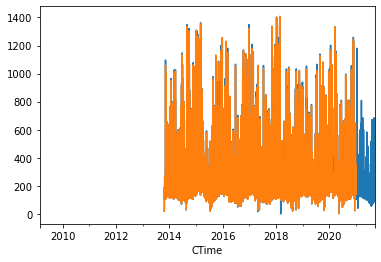

In [167]:
df_unsmoothed.loc[:,'RVK-GEL'].plot()
df_smoothed.loc[:,'RVK-GEL'].plot()

In [138]:
df_unsmoothed = pd.concat(unsmoothed_list,axis=1)
df_unsmoothed.columns = df.ID
df_unsmoothed.to_pickle('all_drainage_data_uncorrected.pkl')

In [137]:
for col in df_smoothed:
    plt.figure(figsize=(16,5))
    plt.plot(df_smoothed.loc[:,col])
    # plt.twinx().plot(df_inputs.iloc[:,[0,-1]])
    plt.title(col)
    plt.show()

NameError: name 'df_smoothed' is not defined

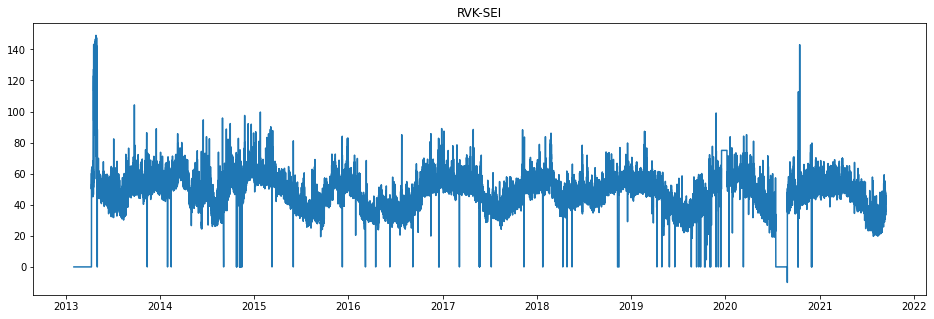

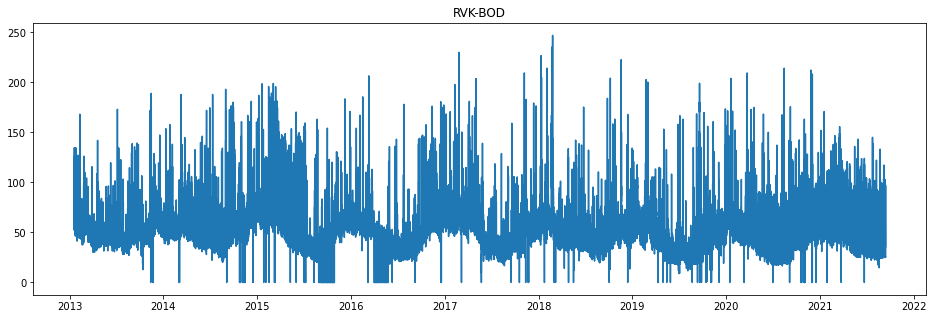

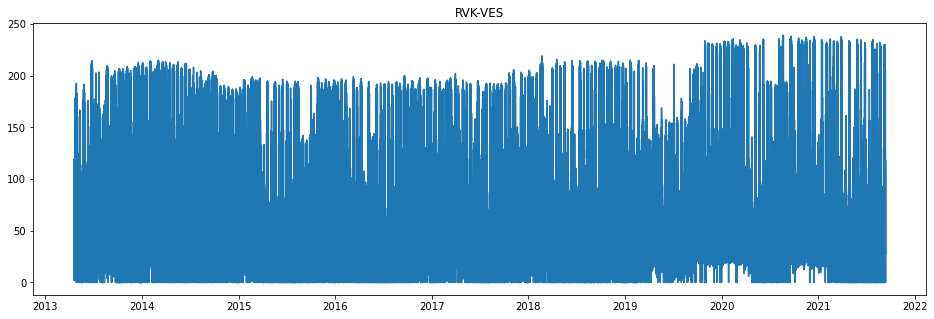

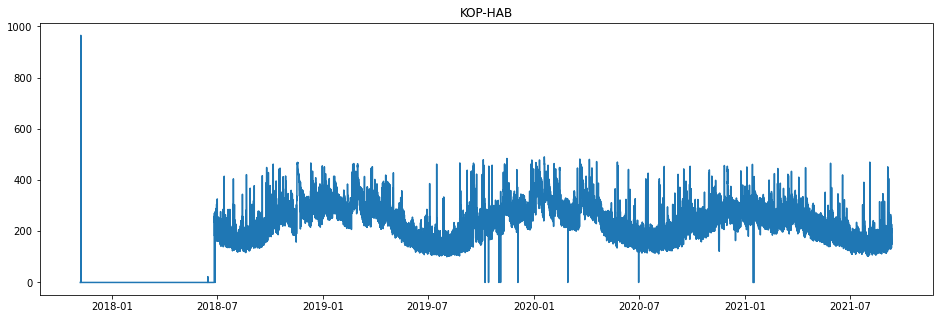

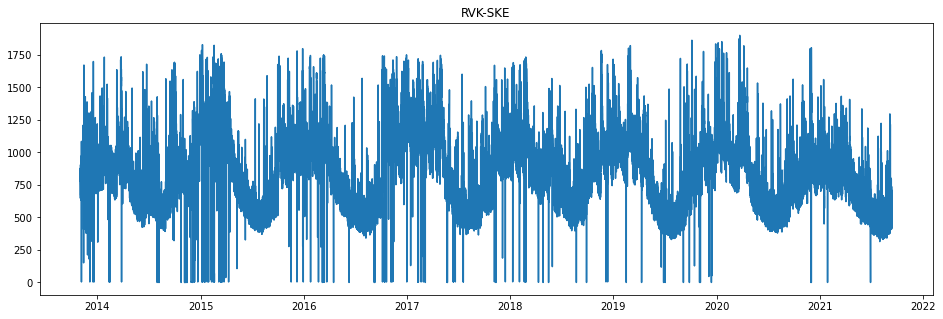

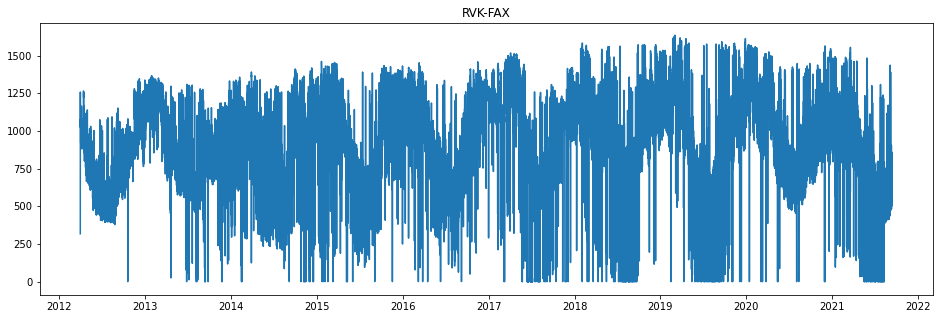

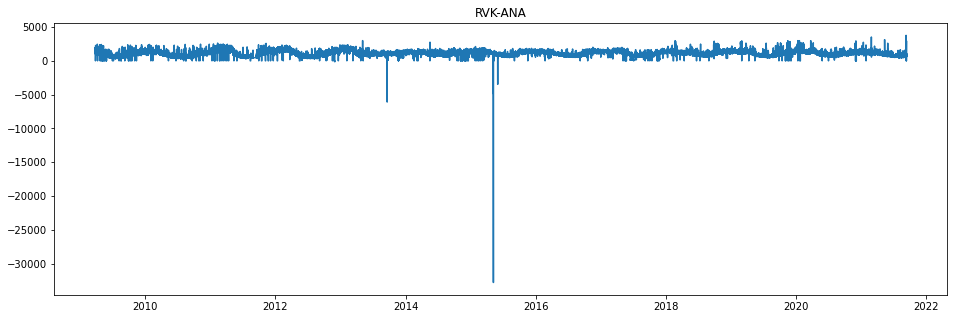

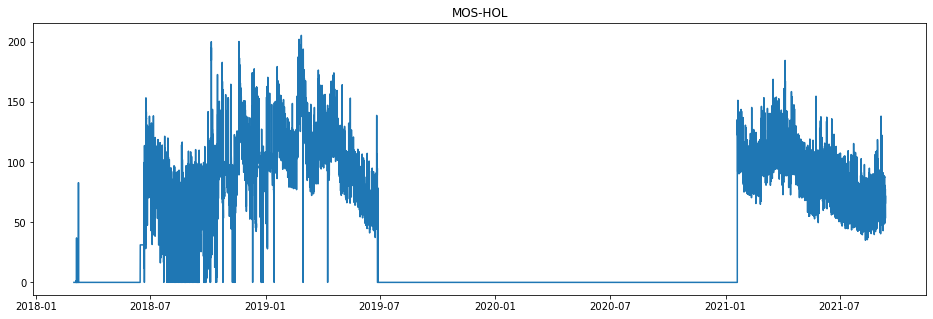

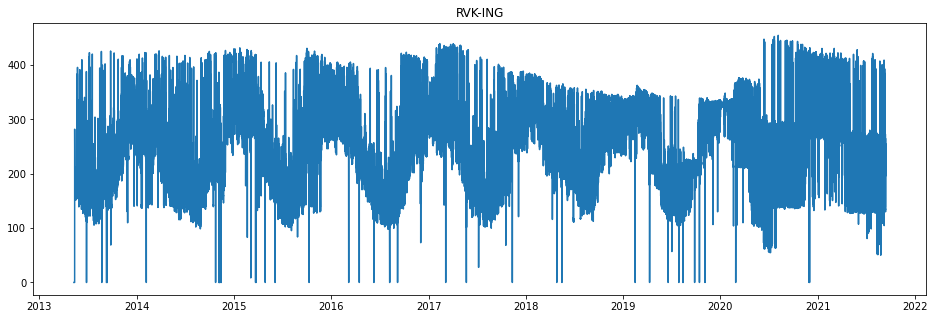

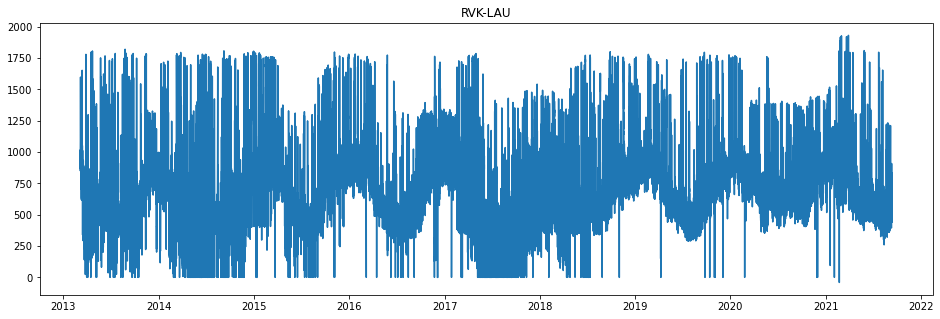

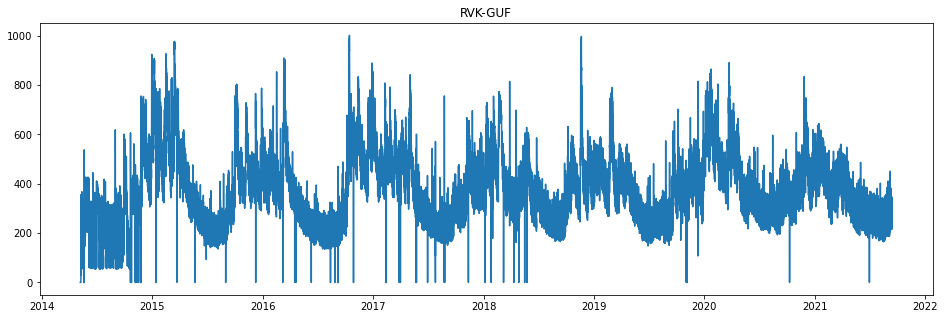

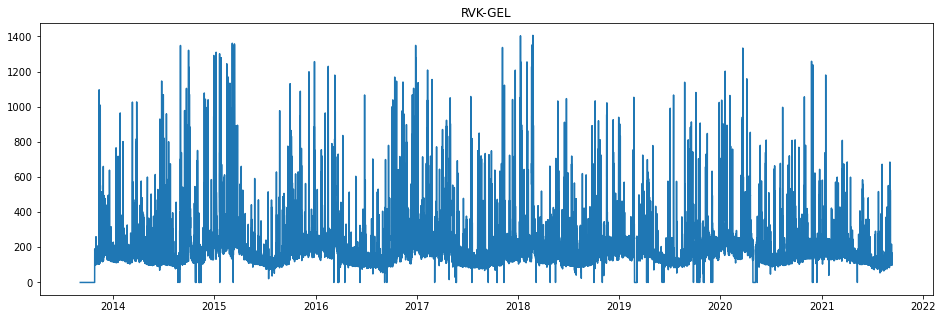

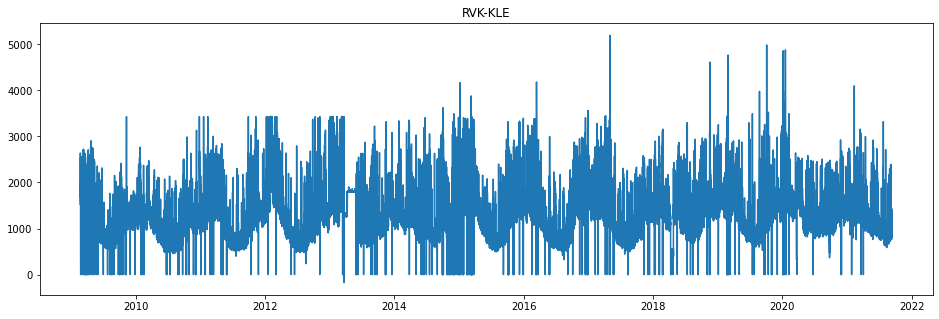

In [134]:
for col in df_unsmoothed:
    plt.figure(figsize=(16,5))
    plt.plot(df_unsmoothed.loc[:,col])
    # plt.twinx().plot(df_inputs.iloc[:,[0,-1]])
    plt.title(col)
    plt.show()

In [ ]:
# scores_tmp = []
# x_range = range(-200,200)
# for i in x_range:
#     scores_tmp.append(smoothness_test(test_flow,test_level,i))
    
# plt.plot(x_range,scores_tmp)

In [ ]:
print(smoothness_test(test_flow,test_level,results.x))
print(smoothness_test(test_flow,test_level,0))

NameError: name 'test_flow' is not defined

In [ ]:
print('mean diff:',np.nanmean(np.diff(test_level.values.ravel())))

print('mean before:',np.nanmean(test_flow))

print('mean after:',np.nanmean(smoothed))


In [ ]:
smoothed = apply_storage_estimate(test_flow,test_level,results.x)
plt.plot(test_flow)
plt.plot(smoothed)
plt.show()

plt.plot(test_flow.values)
plt.plot(smoothed.values)
plt.xlim(200,300)
plt.show()

In [ ]:
test_matrix

Name,F-MOS-HOL-RS101,F-MOS-HOL-RS102
CTime,,
2018-03-01 16:00:00,0.000000,NaN
2018-03-01 17:00:00,0.000000,NaN
2018-03-01 18:00:00,0.000000,NaN
2018-03-01 19:00:00,0.000000,NaN
2018-03-01 20:00:00,0.000000,NaN
...,...,...
2021-09-11 22:00:00,0.006121,0.013073
2021-09-11 23:00:00,0.005528,66.724650
2021-09-12 00:00:00,50.887756,6.762144


<AxesSubplot:>

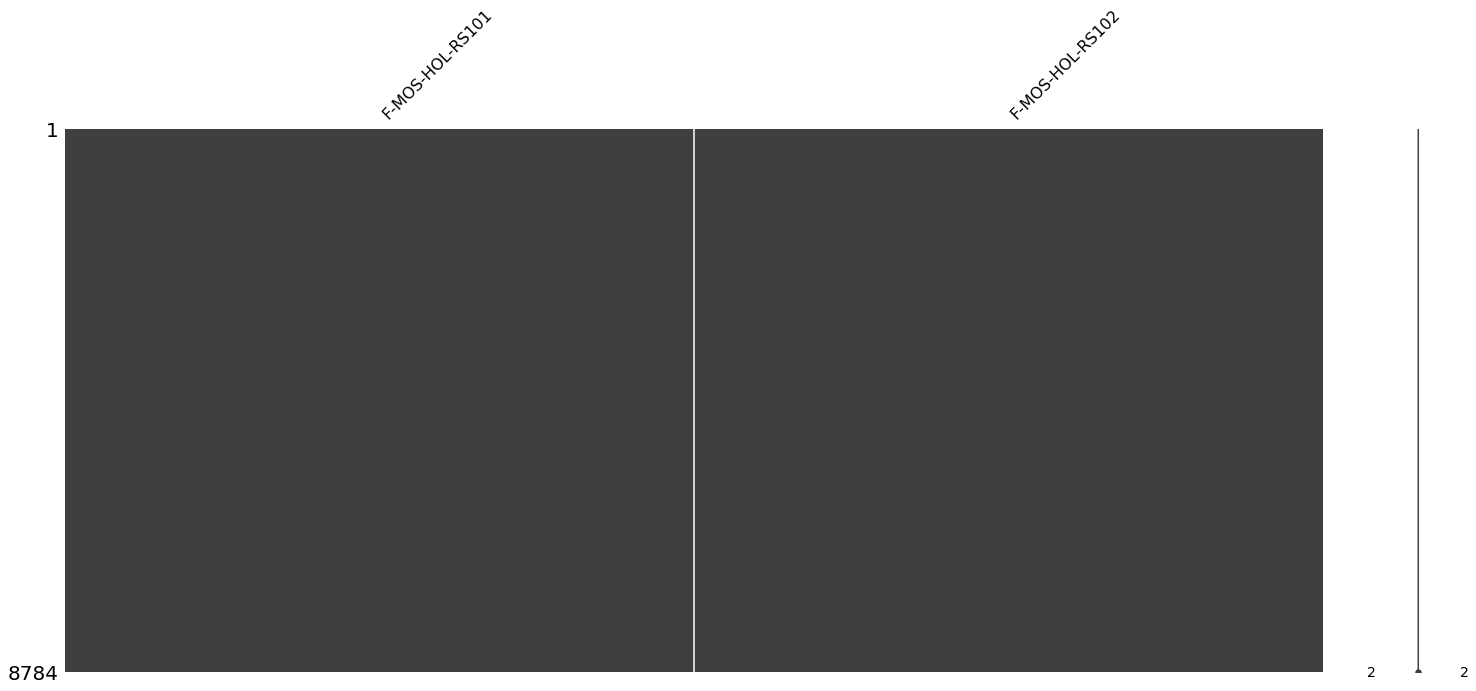

In [ ]:
test_matrix = dict_flow['MOS-HOL'].pivot_table(values='Val',columns = 'Name',index = 'CTime')
tmp_index = pd.date_range(datetime.datetime(2020,1,1,0,0,0),datetime.datetime(2020,12,31,23,59,59),freq='1h')
matrix(test_matrix.reindex(tmp_index))